## ANN on mnist Datasets:-

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten,Dense 


In [2]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

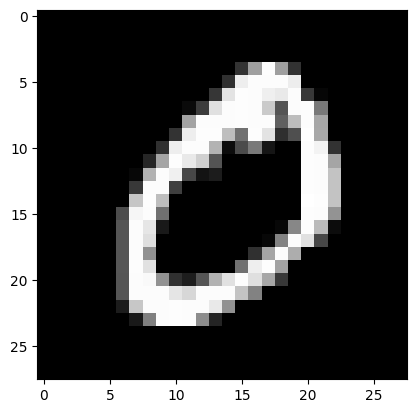

In [3]:
plt.imshow(X_train[1],cmap="gray")

In [4]:
x_valid,x_train=X_train[:5000]/255.,X_train[5000:]/255.
y_valid,y_train=y_train[:5000],y_train[5000:]
y_test=y_test
x_test=X_test/255

In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((55000, 28, 28), (10000, 28, 28), (55000,), (10000,))

<Axes: >

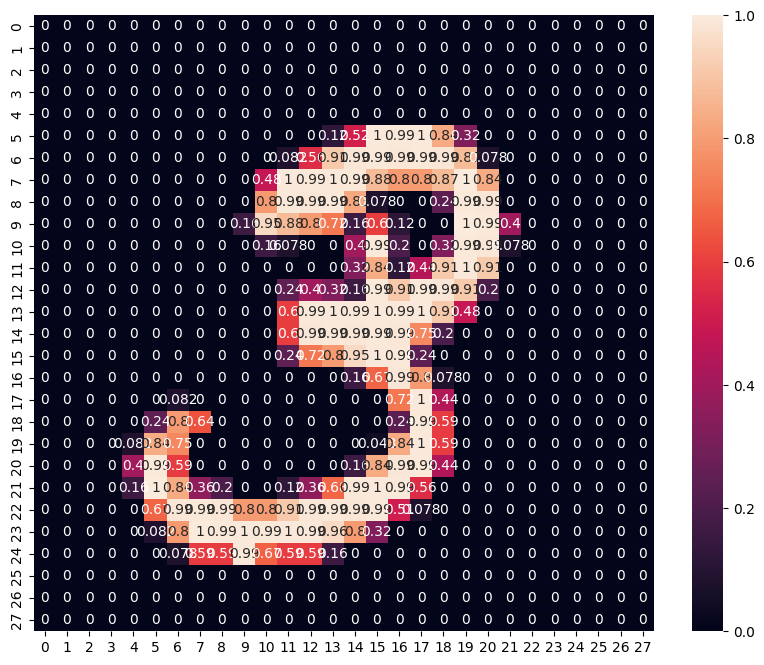

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train[1],annot =True)

In [21]:
LAYERS=[
    
    keras.layers.Flatten(input_shape=(28,28),name="InputLayer"),
    keras.layers.Dense(300,activation="relu",name="HiddenLayer1"),
    keras.layers.Dense(100,activation="relu",name="HiddenLayer2"),
    keras.layers.Dense(10,activation="softmax",name="OutputLayer")

]

In [22]:
model=Sequential(LAYERS)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [24]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid),batch_size=128)

Epoch 1/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8244 - loss: 0.6023 - val_accuracy: 0.9588 - val_loss: 0.1389
Epoch 2/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9463 - loss: 0.1736 - val_accuracy: 0.9710 - val_loss: 0.0992
Epoch 3/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9597 - loss: 0.1275 - val_accuracy: 0.9766 - val_loss: 0.0822
Epoch 4/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9685 - loss: 0.0992 - val_accuracy: 0.9806 - val_loss: 0.0700
Epoch 5/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0806 - val_accuracy: 0.9802 - val_loss: 0.0666
Epoch 6/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9762 - loss: 0.0743 - val_accuracy: 0.9812 - val_loss: 0.0659
Epoch 7/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9776 - loss: 0.0703 - val_accuracy: 0.9832 - val_loss: 0.0548
Epoch 8/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9802 - loss: 0.0595 - val_accuracy: 0

In [11]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.919764,0.281268,0.9612,0.131616
1,0.968455,0.107313,0.9724,0.089791
2,0.978018,0.071983,0.9744,0.085592
3,0.985164,0.048545,0.9744,0.082975
4,0.987636,0.039963,0.9770,0.072802
5,0.991091,0.028557,0.9804,0.068797
6,0.992909,0.021581,0.9804,0.069731
7,0.994727,0.017277,0.9808,0.076594
8,0.995091,0.015471,0.9808,0.073937
9,0.996200,0.012517,0.9762,0.078535


<Axes: >

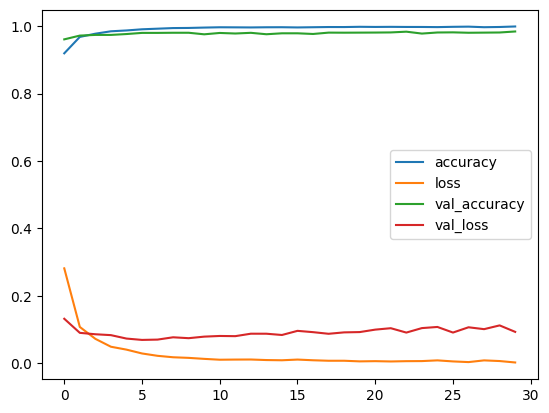

In [12]:
pd.DataFrame(history.history).plot()

In [13]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9816 - loss: 0.1214


[0.10920755565166473, 0.9832000136375427]

In [14]:
x_new=x_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
actual_val=y_test[:3]
actual_val

array([7, 2, 1], dtype=uint8)

In [16]:
y_prob=model.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

##########


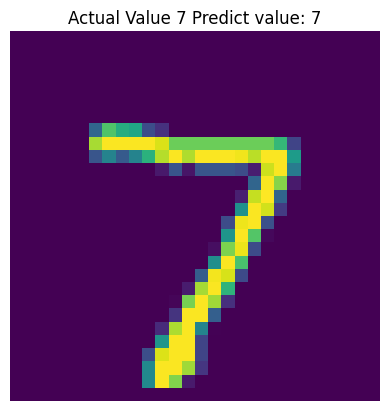

##########


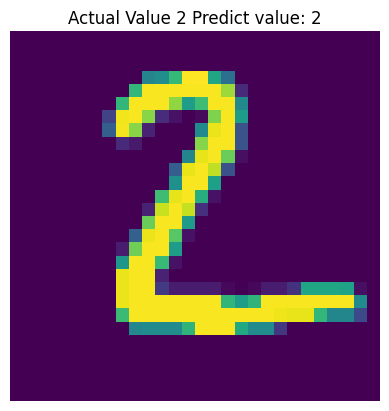

##########


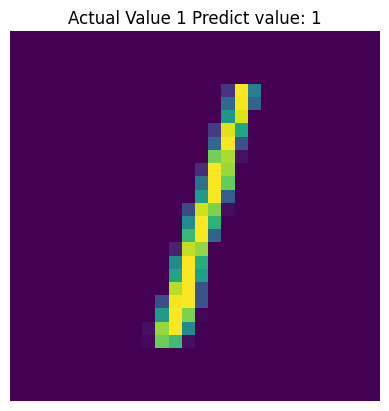

In [18]:
for data ,actual,predict in zip(x_new,actual_val,y_pred):
    plt.title(f"Actual Value {actual} Predict value: {predict}")
    plt.axis("off")
    plt.imshow(data)
    print("##########")
    plt.show()